In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from interstellar import Tracks, DenseNetwork, renormalize, normalize
from scipy import stats

In [4]:
name = 'network_10'
network_path = f'../data/networks/{name}'

tracks = 'tracks_04c_test'
test = pd.read_csv(f'/home/ADF/ajl573/Data/interstellar_data/{tracks}/{tracks}_data.csv')

## log cols

From these histograms it makes sense to log star age and radius, with everything else to be scaled in the training set.

In [5]:
test['log_star_age'] = np.log10(test['star_age'])

In [6]:
print('Length = ', len(test))
test.head()

Length =  2604247


,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit,frac_evol,gradient,log_star_age
0,1,0.955,0.29,0.017696,0.15,1.4,0.101533,0.010515,5340.6064,0.601833,0.907436,4.502261,0.289404,0.017670,0.148902,153.64706,0.010515,0.000304,-0.993394
1,1,0.955,0.29,0.017696,0.15,1.4,0.113827,0.011788,5342.0340,0.603564,0.908254,4.501479,0.289308,0.017665,0.148715,153.44257,0.011788,0.000293,-0.943754
2,1,0.955,0.29,0.017696,0.15,1.4,0.128580,0.013316,5343.3000,0.605240,0.909083,4.500686,0.289194,0.017659,0.148491,153.23601,0.013316,0.000272,-0.890825
3,1,0.955,0.29,0.017696,0.15,1.4,0.146284,0.015149,5344.3800,0.606864,0.909934,4.499873,0.289055,0.017652,0.148219,153.02490,0.015149,0.000255,-0.834802
4,1,0.955,0.29,0.017696,0.15,1.4,0.167529,0.017350,5345.3080,0.608473,0.910823,4.499025,0.288889,0.017643,0.147893,152.80542,0.017350,0.000250,-0.775910


In [7]:
network = DenseNetwork.from_config(f'{network_path}/{name}_config.json')
network.load_model(suffix='best_model')
network.load_history()
network.model.summary()

Model: "network_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 5)]               0         
_________________________________________________________________
dense (Dense)                (None, 128)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1

In [8]:
factors = pd.read_csv(f'{network_path}/{name}_norm.csv')

In [9]:
factors

,column,norm_column,loc,scale
0,frac_evol,frac_evol_norm,0.865,0.651
1,initial_mass,initial_mass_norm,1.000,0.118
2,initial_MLT,initial_MLT_norm,1.900,0.338
3,initial_Yinit,initial_Yinit_norm,0.280,0.028
4,initial_Zinit,initial_Zinit_norm,0.017,0.011
5,log_star_age,log_star_age_norm,0.790,0.467
6,effective_T,effective_T_norm,5566.772,601.172
7,radius,radius_norm,1.224,0.503
8,delta_nu_fit,delta_nu_fit_norm,100.720,42.582
9,star_feh,star_feh_norm,0.081,0.361


In [10]:
test[factors['norm_column']] = normalize(test[factors['column']], loc=factors['loc'].to_numpy(), scale=factors['scale'].to_numpy())

In [11]:
test.head()

,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,star_age,frac_age,effective_T,luminosity,...,frac_evol_norm,initial_mass_norm,initial_MLT_norm,initial_Yinit_norm,initial_Zinit_norm,log_star_age_norm,effective_T_norm,radius_norm,delta_nu_fit_norm,star_feh_norm
0,1,0.955,0.29,0.017696,0.15,1.4,0.101533,0.010515,5340.6064,0.601833,...,-1.312573,-0.381356,-1.47929,0.357143,0.063317,-3.818830,-0.376208,-0.629353,1.242944,0.188094
1,1,0.955,0.29,0.017696,0.15,1.4,0.113827,0.011788,5342.0340,0.603564,...,-1.310617,-0.381356,-1.47929,0.357143,0.063317,-3.712535,-0.373833,-0.627727,1.238142,0.187576
2,1,0.955,0.29,0.017696,0.15,1.4,0.128580,0.013316,5343.3000,0.605240,...,-1.308270,-0.381356,-1.47929,0.357143,0.063317,-3.599197,-0.371727,-0.626078,1.233291,0.186956
3,1,0.955,0.29,0.017696,0.15,1.4,0.146284,0.015149,5344.3800,0.606864,...,-1.305454,-0.381356,-1.47929,0.357143,0.063317,-3.479234,-0.369931,-0.624385,1.228334,0.186201
4,1,0.955,0.29,0.017696,0.15,1.4,0.167529,0.017350,5345.3080,0.608473,...,-1.302074,-0.381356,-1.47929,0.357143,0.063317,-3.353127,-0.368387,-0.622618,1.223179,0.185298


## Validation plots

In [12]:
# network.plot_metric(test.sample(20000), metric='absolute_error', save_plot=False);

In [13]:
# network.plot_metric(test.sample(20000), metric='error', save_plot=False);

In [14]:
test_pred = network.model.predict(test[network.x_cols], batch_size=network.batch_size)
test_pred = pd.DataFrame(test_pred, columns=network.y_cols)

In [15]:
test_pred = test_pred.join(Tracks.renormalize(_, test_pred, factors=factors[factors['norm_column'].isin(network.y_cols)]))

In [16]:
log_cols = [col for col in test_pred.columns if 'log' in col]
log_cols

['log_star_age_norm', 'log_star_age']

In [17]:
for col in log_cols:
    test_pred[col[4:]] = 10**test_pred[col]
    if col in test.columns:
        test[col[4:]] = 10**test[col]

In [18]:
pred_cols = {col: f'{col}_pred' for col in test_pred.columns}
pred_cols

{'log_star_age_norm': 'log_star_age_norm_pred',
 'effective_T_norm': 'effective_T_norm_pred',
 'radius_norm': 'radius_norm_pred',
 'delta_nu_fit_norm': 'delta_nu_fit_norm_pred',
 'star_feh_norm': 'star_feh_norm_pred',
 'log_star_age': 'log_star_age_pred',
 'effective_T': 'effective_T_pred',
 'radius': 'radius_pred',
 'delta_nu_fit': 'delta_nu_fit_pred',
 'star_feh': 'star_feh_pred',
 'star_age_norm': 'star_age_norm_pred',
 'star_age': 'star_age_pred'}

In [19]:
test_pred.rename(columns=pred_cols, inplace=True)
test_pred.head()

,log_star_age_norm_pred,effective_T_norm_pred,radius_norm_pred,delta_nu_fit_norm_pred,star_feh_norm_pred,log_star_age_pred,effective_T_pred,radius_pred,delta_nu_fit_pred,star_feh_pred,star_age_norm_pred,star_age_pred
0,-3.826824,-0.379033,-0.628611,1.245354,0.188281,-0.997127,5338.908203,0.907809,153.749664,0.148970,0.000149,0.100664
1,-3.722570,-0.376996,-0.627309,1.241304,0.187721,-0.948440,5340.132812,0.908464,153.577194,0.148767,0.000189,0.112606
2,-3.609471,-0.375026,-0.625868,1.236869,0.187056,-0.895623,5341.316895,0.909189,153.388336,0.148527,0.000246,0.127168
3,-3.488545,-0.373159,-0.624285,1.232060,0.186269,-0.839150,5342.439453,0.909984,153.183578,0.148243,0.000325,0.144827
4,-3.360689,-0.371410,-0.622560,1.226866,0.185339,-0.779442,5343.490723,0.910852,152.962433,0.147907,0.000436,0.166172


In [20]:
df = test.join(test_pred)
df.head()

,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,star_age,frac_age,effective_T,luminosity,...,radius_norm_pred,delta_nu_fit_norm_pred,star_feh_norm_pred,log_star_age_pred,effective_T_pred,radius_pred,delta_nu_fit_pred,star_feh_pred,star_age_norm_pred,star_age_pred
0,1,0.955,0.29,0.017696,0.15,1.4,0.101533,0.010515,5340.6064,0.601833,...,-0.628611,1.245354,0.188281,-0.997127,5338.908203,0.907809,153.749664,0.148970,0.000149,0.100664
1,1,0.955,0.29,0.017696,0.15,1.4,0.113827,0.011788,5342.0340,0.603564,...,-0.627309,1.241304,0.187721,-0.948440,5340.132812,0.908464,153.577194,0.148767,0.000189,0.112606
2,1,0.955,0.29,0.017696,0.15,1.4,0.128580,0.013316,5343.3000,0.605240,...,-0.625868,1.236869,0.187056,-0.895623,5341.316895,0.909189,153.388336,0.148527,0.000246,0.127168
3,1,0.955,0.29,0.017696,0.15,1.4,0.146284,0.015149,5344.3800,0.606864,...,-0.624285,1.232060,0.186269,-0.839150,5342.439453,0.909984,153.183578,0.148243,0.000325,0.144827
4,1,0.955,0.29,0.017696,0.15,1.4,0.167529,0.017350,5345.3080,0.608473,...,-0.622560,1.226866,0.185339,-0.779442,5343.490723,0.910852,152.962433,0.147907,0.000436,0.166172


In [21]:
del(test)
del(test_pred)

In [22]:
err_cols = [f'{col}_err' for col in pred_cols.keys()]
err_cols

['log_star_age_norm_err',
 'effective_T_norm_err',
 'radius_norm_err',
 'delta_nu_fit_norm_err',
 'star_feh_norm_err',
 'log_star_age_err',
 'effective_T_err',
 'radius_err',
 'delta_nu_fit_err',
 'star_feh_err',
 'star_age_norm_err',
 'star_age_err']

In [23]:
df[err_cols] = pd.DataFrame(df[pred_cols.keys()].to_numpy() - df[pred_cols.values()].to_numpy())

In [24]:
df['log_g_pred'] = 4.44 + np.log10(df['initial_mass']) - 2 * np.log10(df['radius_pred'])

In [25]:
df.head()

,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,star_age,frac_age,effective_T,luminosity,...,delta_nu_fit_norm_err,star_feh_norm_err,log_star_age_err,effective_T_err,radius_err,delta_nu_fit_err,star_feh_err,star_age_norm_err,star_age_err,log_g_pred
0,1,0.955,0.29,0.017696,0.15,1.4,0.101533,0.010515,5340.6064,0.601833,...,-0.002409,-0.000187,0.003733,1.698197,-0.000373,-0.102604,-0.000068,0.000003,0.000869,4.504015
1,1,0.955,0.29,0.017696,0.15,1.4,0.113827,0.011788,5342.0340,0.603564,...,-0.003161,-0.000145,0.004686,1.901188,-0.000210,-0.134624,-0.000052,0.000004,0.001222,4.503388
2,1,0.955,0.29,0.017696,0.15,1.4,0.128580,0.013316,5343.3000,0.605240,...,-0.003577,-0.000100,0.004798,1.983105,-0.000106,-0.152326,-0.000036,0.000006,0.001413,4.502695
3,1,0.955,0.29,0.017696,0.15,1.4,0.146284,0.015149,5344.3800,0.606864,...,-0.003726,-0.000068,0.004348,1.940547,-0.000050,-0.158678,-0.000025,0.000007,0.001457,4.501935
4,1,0.955,0.29,0.017696,0.15,1.4,0.167529,0.017350,5345.3080,0.608473,...,-0.003687,-0.000041,0.003532,1.817277,-0.000030,-0.157013,-0.000015,0.000008,0.001357,4.501107


In [26]:
# condition = (np.isclose(df['initial_MLT'], 2.0)) &\
#             (np.isclose(df['initial_Yinit'], 0.27))

In [27]:
# fig, ax = plt.subplots(figsize=(16, 16))

# df[condition].abs().plot(ax=ax, kind='scatter', x='effective_T', y='log_g', 
#         c='star_age_err', cmap='plasma', s=1, alpha=0.5)

# ax.invert_xaxis()
# ax.invert_yaxis()

In [28]:
# fig, ax = plt.subplots(figsize=(16, 16))

# df[condition].abs().plot(ax=ax, kind='scatter', x='effective_T', y='log_g', 
#         c='delta_nu_fit_err', cmap='plasma', s=1, alpha=0.5, vmax=3.5)

# ax.invert_xaxis()
# ax.invert_yaxis()

In [29]:
# fig, ax = plt.subplots(figsize=(16, 16))

# df[condition].abs().plot(ax=ax, kind='scatter', x='effective_T', y='log_g', 
#         c='star_feh_err', cmap='plasma', s=1, alpha=0.5)

# ax.invert_xaxis()
# ax.invert_yaxis()

In [30]:
# fig, ax = plt.subplots(figsize=(16, 16))

# df[condition].abs().plot(ax=ax, kind='scatter', x='effective_T', y='log_g', 
#         c='radius_err', cmap='plasma', s=1, alpha=0.5)

# ax.invert_xaxis()
# ax.invert_yaxis()

In [31]:
# fig, ax = plt.subplots(figsize=(16, 16))

# df[condition].abs().plot(ax=ax, kind='scatter', x='effective_T', y='log_g', 
#         c='effective_T_err', cmap='plasma', s=1, alpha=0.5)

# ax.invert_xaxis()
# ax.invert_yaxis()

In [61]:
def plot_rolling(data, column, suffix='err', 
                 window_width=100000, window_type=None, window_kwargs={}, ax=None, subplot_kwargs={}):
    ''' Plots rolling stats of the error of a given `column` in `data`. 
    The `window_width` is the size of the convolution in rows of `data`.'''
    if ax is None:
        _, ax = plt.subplots(**subplot_kwargs)
    
    err_col = f'{column}_{suffix}'
    data_sort = data.sort_values(column)
    
    rolling_mean = data_sort[err_col].rolling(window_width, win_type=window_type).mean(**window_kwargs)
    rolling_median = data_sort[err_col].rolling(window_width, win_type=window_type).median(**window_kwargs)
#     rolling_std = data_sort[err_col].rolling(window_width, win_type=window_type).std(**window_kwargs)
#     rolling_3 = data_sort[err_col].rolling(window_width, win_type=window_type).quantile(.025, **window_kwargs)
    rolling_16 = data_sort[err_col].rolling(window_width, win_type=window_type).quantile(.16, **window_kwargs)
    rolling_84 = data_sort[err_col].rolling(window_width, win_type=window_type).quantile(.84, **window_kwargs)
#     rolling_98 = data_sort[err_col].rolling(window_width, win_type=window_type).quantile(.975, **window_kwargs)

    ax.plot(data_sort[column], rolling_mean, 'k', alpha=0.8, label='mean')
    ax.plot(data_sort[column], rolling_median, 'k--', alpha=0.8, label='median')
#     ax.fill_between(data_sort[column], rolling_mean+rolling_std, rolling_mean-rolling_std, 
#                     facecolor='grey', alpha=0.4, label='rolling std')
#     ax.fill_between(data_sort[column], rolling_98, rolling_3, 
#                     facecolor='grey', alpha=0.2, label='95%')
    ax.fill_between(data_sort[column], rolling_84, rolling_16, 
                    facecolor='grey', alpha=0.5, label='68%')

    
    ax.set_xlabel(column)
    ax.set_ylabel(err_col)
#     ax.legend();
    return ax

In [33]:
df.columns

Index(['evol_stage', 'initial_mass', 'initial_Yinit', 'initial_Zinit',
       'initial_feh', 'initial_MLT', 'star_age', 'frac_age', 'effective_T',
       'luminosity', 'radius', 'log_g', 'surface_he4', 'surface_Z', 'star_feh',
       'delta_nu_fit', 'frac_evol', 'gradient', 'log_star_age',
       'frac_evol_norm', 'initial_mass_norm', 'initial_MLT_norm',
       'initial_Yinit_norm', 'initial_Zinit_norm', 'log_star_age_norm',
       'effective_T_norm', 'radius_norm', 'delta_nu_fit_norm', 'star_feh_norm',
       'star_age_norm', 'log_star_age_norm_pred', 'effective_T_norm_pred',
       'radius_norm_pred', 'delta_nu_fit_norm_pred', 'star_feh_norm_pred',
       'log_star_age_pred', 'effective_T_pred', 'radius_pred',
       'delta_nu_fit_pred', 'star_feh_pred', 'star_age_norm_pred',
       'star_age_pred', 'log_star_age_norm_err', 'effective_T_norm_err',
       'radius_norm_err', 'delta_nu_fit_norm_err', 'star_feh_norm_err',
       'log_star_age_err', 'effective_T_err', 'radius_err', 'delta

In [34]:
solar_teff = 5777.
df['luminosity_pred'] = df['radius_pred']**2 * (df['effective_T_pred']/solar_teff)**4
df['luminosity_err'] = df['luminosity'] - df['luminosity_pred']

In [35]:
# df_sample = df.sample(50000)
df_sample = df[df['star_age']<15].copy()

In [36]:
del(df)

In [37]:
col = 'delta_nu_fit'
df_sample[f'{col}_rel_err'] = abs(df_sample[f'{col}_err'] / df_sample[col])

In [38]:
col = 'delta_nu_fit'
df_sample[f'{col}_abs_rel_err'] = abs(df_sample[f'{col}_rel_err'])

In [73]:
columns = [
    'star_age', 'effective_T', 'radius', 
    'luminosity', 'delta_nu_fit', 'star_feh'
]

suffixes = [
    'per_err', 'err', 'per_err', 
    'per_err', 'err', 'err'
]

labels = {
    'star_age': [r'\tau', r'(\mathrm{Gyr})'],
    'effective_T': [r'T_\mathrm{eff}' ,r'(\mathrm{K})'],
    'radius': [r'R', r'(\mathrm{R}_\odot)'],
    'luminosity': [r'L', r'(\mathrm{L}_\odot)'],
    'delta_nu_fit': [r'\Delta\nu', r'(\mathrm{\mu Hz})'],
    'star_feh': [r'[\mathrm{M}/\mathrm{H}]_\mathrm{surf}', r'(\mathrm{dex})'],
}

In [40]:
# plt.style.use('seaborn-paper')
# fig, axes = plt.subplots(3, 2, figsize=(8, 9), dpi=300,
#                         gridspec_kw={'wspace': 0.3, 'hspace': 0.3})

# columns = [
#     'star_age', 'effective_T', 'radius', 
#     'luminosity', 'delta_nu_fit', 'star_feh'
# ]

# labels = {
#     'star_age': [r'\tau', r'(\mathrm{Gyr})'],
#     'effective_T': [r'T_\mathrm{eff}' ,r'(\mathrm{K})'],
#     'radius': [r'R', r'(\mathrm{R}_\odot)'],
#     'luminosity': [r'L', r'(\mathrm{L}_\odot)'],
#     'delta_nu_fit': [r'\Delta\nu', r'(\mathrm{\mu Hz})'],
#     'star_feh': [r'[\mathrm{M}/\mathrm{H}]_\mathrm{surf}', r'(\mathrm{dex})'],
# }
# plot_legend = True
# for ax, col in zip(axes.flatten(), columns):
#     plot_rolling(df_sample, col, ax=ax)
#     if '_' in labels[col][0]:
#         ax.set_xlabel('$'+labels[col][0]+r'^\mathrm{true}\,'+labels[col][1]+'$')
#         ax.set_ylabel('$'+labels[col][0]+r'^\mathrm{true} - '+\
#                           labels[col][0]+r'^\mathrm{pred}\,'+labels[col][1]+'$')
#     else:
#         ax.set_xlabel('$'+labels[col][0]+r'_\mathrm{true}\,'+labels[col][1]+'$')
#         ax.set_ylabel('$'+labels[col][0]+r'_\mathrm{true} - '+\
#                           labels[col][0]+r'_\mathrm{pred}\,'+labels[col][1]+'$')
#     if plot_legend:
#         ax.legend()
#         plot_legend = False

# fig.savefig('../paper/figures/validation.png', bbox_inches='tight')

In [41]:
# cond = test['star_age'] < 15.0
# scores = network.scores(test[cond], metric='error', predict_kw={'batch_size': network.batch_size})
# scores.head()

In [42]:
# scale_scores = factors.loc[5:, 'scale'].to_numpy() * scores
# scale_scores

In [43]:
# log_cols = [col for col in scale_scores.columns if 'log' in col]
# log_cols

In [44]:
# scale_scores[[col[4:] for col in log_cols]] = scale_scores[log_cols] * np.log(10.0)

In [45]:
# scale_scores.loc['std'].round(5)

Note: here, star_age_norm is a percent error and the rest are absolute

In [65]:
def plot_err_dist(data, column, x_range=None, ax=None, subplot_kwargs={}, n_sig=4):
#     mle_norm = stats.norm.fit(data[column])
    mle_norm = (np.median(data[column]), stats.median_absolute_deviation(data[column]))
#     mle_t = stats.t.fit(data[column])
    mle_t = None
    
    if ax is None:
        _, ax = plt.subplots(**subplot_kwargs)
    if x_range is None:
        x_range = [mle_norm[0]-n_sig*mle_norm[1], mle_norm[0]+n_sig*mle_norm[1]]
    x = np.linspace(*x_range, 1000)
    pdf_norm = stats.norm.pdf(x, *mle_norm)
#     pdf_t = stats.t.pdf(x, *mle_t)
    
    sns.distplot(data.loc[data[column].between(*x_range), column], label='KDE', vertical=True, ax=ax)
#     ax = data.plot(kind='hist', y=column, bins=100, range=x_range, density=True, facecolor='grey')
#     ax.plot(pdf_t, x, label="student's t")
    ax.plot(pdf_norm, x, label=r'$\mathcal{N}(\mu_\frac{1}{2}, \sigma_\mathrm{MAD})$')

#     ax.set_ylim(x_range)
    col = column[:-4]
#     ax.set_ylabel('$'+labels[col][0]+r'_\mathrm{true} - '+\
#                       labels[col][0]+r'_\mathrm{pred}\,'+labels[col][1]+'$')
    ax.set_xlabel('density')
#     ax.legend()
    return ax, mle_norm, mle_t

In [67]:
for col in columns:
    df_sample[f'{col}_rel_err'] = df_sample[f'{col}_err'] / df_sample[col]
    df_sample[f'{col}_per_err'] = 100 * df_sample[f'{col}_rel_err']

In [77]:
len(df_sample)

2172490

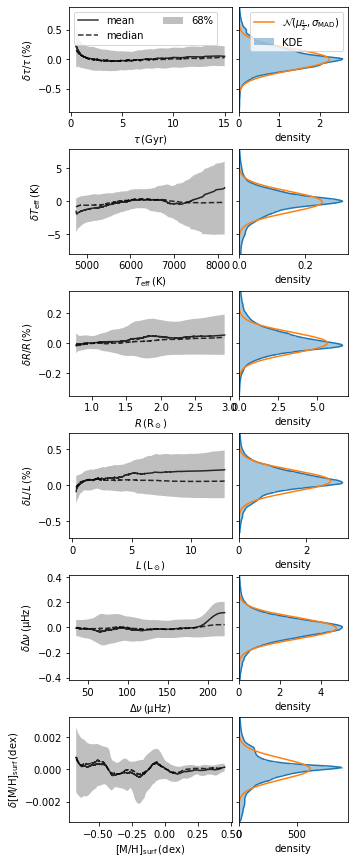

In [78]:
fig, axes = plt.subplots(6, 2, figsize=(5, 15), sharey='row',
                        gridspec_kw={'wspace': 0.05, 'hspace': 0.35, 'width_ratios': [1.5, 1]})

plot_dist = False
plot_legend = True
n_sig = 5

dd = df_sample
window_width=100000

for ax, axdist, col, suffix in zip(axes[:, 0], axes[:, 1], columns, suffixes):
    if plot_dist:
        data = (dd[columns] - dd[columns].min()) / \
            (dd[columns].max() - dd[columns].min())
        for dcol in columns:
            sns.distplot(data[dcol], ax=ax, label='$'+labels[dcol][0]+'$')
        ax.legend(bbox_to_anchor=(1.01, 0.5), loc='center left')
        ax.set_xlabel('min-max scaled')
        ax.set_ylabel('KDE')
        plot_dist = False
        
        axdist.remove()
        continue
    
#     if col == 'star_feh':
#         suffix = 'err'
#     else:
#         suffix = 'rel_err'
    plot_rolling(dd, col, suffix=suffix, ax=ax, window_width=window_width)
    _, mle_norm, mle_t = plot_err_dist(dd, '_'.join([col, suffix]), ax=axdist, n_sig=n_sig)
    axdist.set_ylabel('')
    ax.set_ylim(0.0-n_sig*mle_norm[1], 0.0+n_sig*mle_norm[1])
#     if '_' in labels[col][0]:
#         script = '^'
#     else:
#         script = '_'
    
    ax.set_xlabel('$'+labels[col][0]+r'\,'+labels[col][1]+'$')
    
    if suffix == 'err':
        ylabel = '$\delta '+labels[col][0]+'\,'+labels[col][1]+'$'
    else:
        ylabel = '$\delta '+labels[col][0]+'/'+labels[col][0]
        if suffix == 'per_err':
            ylabel += r'\,(\%)$'
        else:
            ylabel += '$'
    
    ax.set_ylabel(ylabel)
    if plot_legend:
        ax.legend(loc='upper left', ncol=2)
        axdist.legend(loc='upper right')
        plot_legend = False

In [79]:
fig.savefig('../paper/figures/validation.png', dpi=300, bbox_inches='tight')

In [80]:
plt.close(fig)

In [81]:
df = pd.read_csv('../modelling/final_models/stars_results/DR14_ASPC/stars/results.csv')

In [82]:
df['lum_sd'].min()

0.019612183794379238

In [83]:
print('Length = ', len(df_sample))

Length =  2172490


In [97]:
err_cols = ['_'.join([col, suffix]) for col, suffix in zip(columns, suffixes)]
index = []
for label, suffix in zip(labels.values(), suffixes):
    if suffix == 'err':
        ylabel = '$\delta '+label[0]+'\,'+label[1]+'$'
    else:
        ylabel = '$\delta '+label[0]+'/'+label[0]
        if suffix == 'per_err':
            ylabel += r'\,(\%)$'
        else:
            ylabel += '$'
    index.append(ylabel)
# index = ['$'+label[0]+r'^\mathrm{true} - '+\
#              label[0]+r'^\mathrm{pred}\,'+\
#              label[1]+'$' for label in labels.values()]
summary = pd.DataFrame()
summary[r'\textbf{Error}'] = index
summary

,\textbf{Error}
0,"$\delta \tau/\tau\,(\%)$"
1,"$\delta T_\mathrm{eff}\,(\mathrm{K})$"
2,"$\delta R/R\,(\%)$"
3,"$\delta L/L\,(\%)$"
4,"$\delta \Delta\nu\,(\mathrm{\mu Hz})$"
5,$\delta [\mathrm{M}/\mathrm{H}]_\mathrm{surf}\...


In [98]:
summary[r'$\mu_{1/2}$'] = df_sample[err_cols].median().to_numpy()
summary[r'$\sigma_\mathrm{MAD}$'] = stats.median_absolute_deviation(df_sample[err_cols].to_numpy())
# summary[r'$2.5\%$'] = df_sample[err_cols].quantile(.025).to_numpy()
# summary[r'$16\%$'] = df_sample[err_cols].quantile(.16).to_numpy()
# summary[r'$50\%$'] = df_sample[err_cols].quantile(.5).to_numpy()
# summary[r'$84\%$'] = df_sample[err_cols].quantile(.84).to_numpy()
# summary[r'$97.5\%$'] = df_sample[err_cols].quantile(.975).to_numpy()

In [99]:
summary

,\textbf{Error},$\mu_{1/2}$,$\sigma_\mathrm{MAD}$
0,"$\delta \tau/\tau\,(\%)$",-0.002924,0.178292
1,"$\delta T_\mathrm{eff}\,(\mathrm{K})$",-0.099855,1.594901
2,"$\delta R/R\,(\%)$",0.002264,0.070502
3,"$\delta L/L\,(\%)$",0.060312,0.145916
4,"$\delta \Delta\nu\,(\mathrm{\mu Hz})$",-0.007138,0.083642
5,$\delta [\mathrm{M}/\mathrm{H}]_\mathrm{surf}\...,0.000028,0.000652


In [100]:
summary.to_csv('validation.csv')

In [103]:
with open('../paper/validation.tex', 'w') as file:
    with pd.option_context("max_colwidth", 1000):
        s = summary.to_latex(na_rep='---', escape=False, index=False,
                             column_format='crr',
                             float_format='{:.3f}'.format)
    file.write(s)